# Actividad Práctica: Introducción a imagenes medicas

## Objetivo

En este ejercicio práctico trabajaremos con el dataset [Structural MRI Datasets](https://www.kaggle.com/datasets/ilknuricke/neurohackinginrimages) en la plataforma Kaggle. Este conjunto de datos incluye imágenes médicas en formato DICOM (Digital Imaging and Communications in Medicine), ampliamente utilizado en entornos clínicos para almacenar estudios como rayos X, resonancias magnéticas y tomografías.

Al finalizar este taller, el estudiante estará en capacidad de:
* Leer imágenes médicas en formato DICOM utilizando pydicom.
* Acceder a metadatos clínicos y técnicos contenidos en la cabecera DICOM.
* Visualizar imágenes en escala de grises y con diferentes mapas de color (cmap).
* Normalizar y manipular las intensidades de la imagen para facilitar su análisis.
* Aplicar una segmentación binaria simple por umbralización.
* Anonimizar imágenes eliminando o sobrescribiendo datos sensibles.
* Exportar imágenes médicas a formatos estándar (PNG, JPG) preservando la información relevante.


## 1. Introducción al dataset

### 1.1 Descripción del dataset

Este conjunto de datos contiene imágenes cerebrales estructurales obtenidas mediante resonancia magnética (MRI), almacenadas en dos formatos comunes: DICOM y NIfTI. Estos formatos permiten tanto la visualización de las imágenes como un análisis más profundo a través de herramientas de procesamiento avanzadas. El dataset es ideal para aquellos interesados en explorar técnicas de visualización, segmentación, y análisis cuantitativo en neurociencia computacional, especialmente en el contexto de estudios clínicos y de investigación.

<div style="text-align:center;">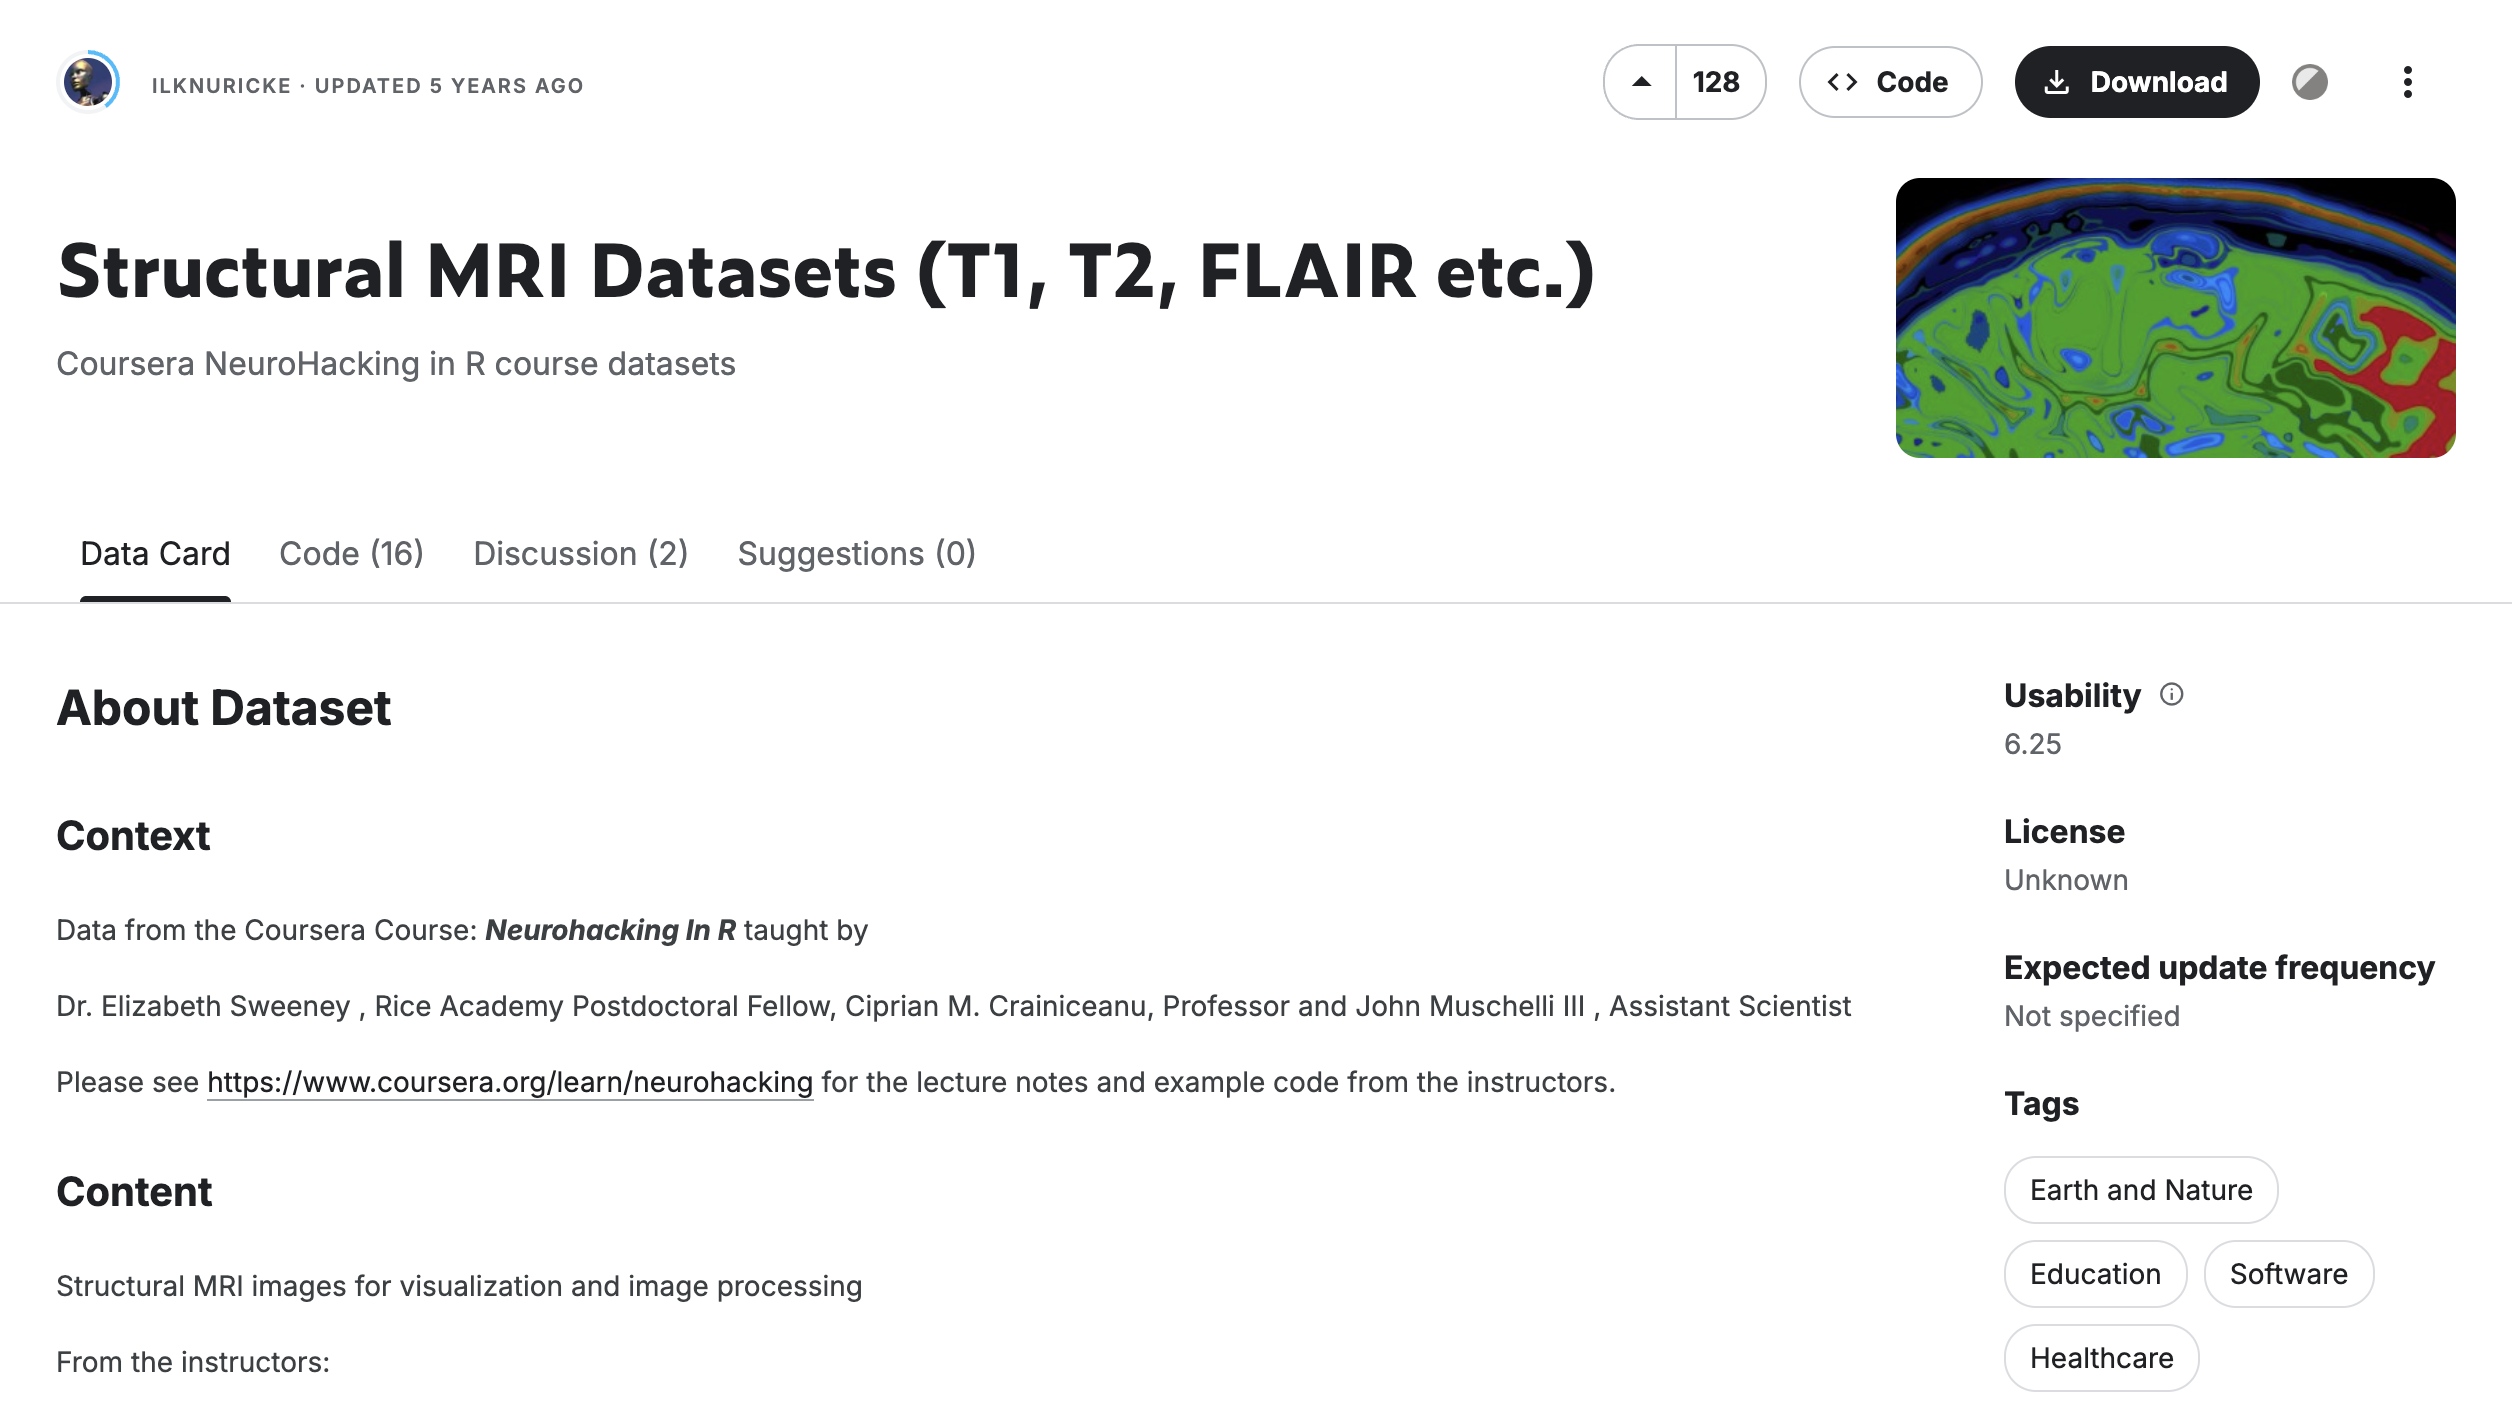</div>



#### DICOM (Digital Imaging and Communications in Medicine)

Este es el formato estándar para el almacenamiento y transmisión de imágenes médicas en el ámbito clínico. Los archivos DICOM contienen no solo la imagen en sí, sino también una gran cantidad de metadatos asociados, incluyendo:

- Parámetros técnicos de adquisición (ej. resolución, grosor de corte)  
- Identificadores del paciente (anonimizados en este caso)  
- Fecha y hora del estudio  
- Modalidad de la imagen (ej. T1, T2, FLAIR)  
- Información del dispositivo de escaneo  

En este dataset, las imágenes DICOM están organizadas según su modalidad dentro de subdirectorios:

- **T1, T2, FLAIR**: diferentes secuencias de imagen utilizadas para resaltar distintas características anatómicas.  
- **ROI**: máscaras de regiones de interés generadas manualmente o automáticamente.  

---

#### NIfTI (Neuroimaging Informatics Technology Initiative)

Este es un formato comúnmente utilizado para el análisis e investigación con imágenes médicas. Es especialmente útil en contextos computacionales y cuantitativos, ya que:

- Contiene la imagen en una estructura 3D o 4D  
- Incluye información espacial como la orientación anatómica y el tamaño del voxel  
- Es fácilmente manipulable en software de análisis de imágenes médicas como FSL, ANTs, SPM, o usando librerías como `nibabel` en Python  

Las imágenes en formato NIfTI (.nii o .nii.gz) permiten operaciones como:

- Visualización tridimensional  
- Registro entre imágenes  
- Segmentación de estructuras  
- Extracción de métricas volumétricas o de intensidad  

---

En resumen, el dataset proporciona imágenes médicas estructurales en formatos DICOM y NIfTI, lo que permite tanto la exploración visual de los datos originales como el análisis computacional.

Al descomprimir el archivo ZIP del dataset, se obtiene una estructura de carpetas que incluye múltiples tipos de imágenes estructurales cerebrales. El contenido se organiza de la siguiente manera:

```
BRAINIX
    ├── DICOM
    │   ├── FLAIR
    │   ├── ROI
    │   ├── T1
    │   └── T2
    └── NIFTI

```

### 1.2 Acceso al dataset

Al igual que el taller anterior, el acceso al dataset se realiza a través de la plataforma Kaggle


In [ ]:
import kagglehub
import os

# Download latest version
folder = kagglehub.dataset_download("ilknuricke/neurohackinginrimages", force_download=True)

print("Ruta a la carpeta:", folder)

!ln -s {folder} ./mri
!unzip -o mri/Neurohacking_data-0.0.zip

> El símbolo ! en Google Colab (y notebooks en general) permite ejecutar comandos de consola (shell/bash) directamente desde una celda de Python.
> Por ejemplo:
> - !ln -s ... crea un enlace simbólico (acceso directo) a una carpeta.
> - !unzip ... descomprime archivos ZIP usando la utilidad del sistema.
## 2. PyDICOM

[PyDICOM](https://pydicom.github.io/) es una de las librerías más populares para trabajar con archivos DICOM en Python. Con PyDICOM puedes:

* **Cargar archivos DICOM desde un directorio.** :Esto permite leer de forma sencilla cualquier archivo DICOM para luego extraer su contenido.

* **Acceder a los metadatos de la cabecera DICOM.** : La cabecera DICOM contiene información importante (como Patient ID, Patient Age, Modality, etc.) que se puede utilizar para identificar o clasificar las imágenes. PyDICOM facilita la extracción de estos atributos.

* **Modificar los campos de metadatos si es necesario.**: Esto es especialmente útil para la anonimización, ya que puedes sobrescribir o eliminar la información sensible del paciente.

### 2.1 Instalación de PyDICOM
Para instalar PyDICOM, puedes ejecutar el siguiente comando en tu terminal o en una celda de Jupyter:
  
    !pip install pydicom
  
Una vez instalada, podrás utilizar sus funciones para cargar y manipular archivos DICOM.

## 3. Importar librerías necesarias





In [ ]:
import pydicom  
import numpy as np 
import matplotlib.pyplot as plt



## 4. Trabajando con imagenes DICOM


### 4.1 Trabajando con multiples archivos
Para listar los archivos DICOM en un directorio específico, puedes usar la librería `os` de Python. Esto te permitirá ver qué archivos están disponibles para su procesamiento. 

#### **Ejercicio 1** 
En este primer ejercicio, se te pide que enumeres todos los archivos DICOM (extensión .dcm) presentes en tu carpeta  `Neurohacking_data-0.0/BRAINIX/DICOM/` para T1 y T2. Al listar sus nombres, podrás confirmar cuántos archivos hay y tener una visión inicial de los datos disponibles. HINT: Los archivos DICOM tienen la extensión `.dcm`. Puedes usar `os.listdir()` para listar los archivos en un directorio y luego filtrar por estas extensiones.


In [ ]:
# <CODE>



### 4.2 Carga de archivos dicom
En este ejercicio se te pedira cargar una imagen T1. Primero necesitas importar la librería `pydicom` y luego usar la función `dcmread()` para leer el archivo. Asegúrate de que el archivo DICOM esté en el directorio correcto.

```python
import pydicom

# Cargar un archivo DICOM
dicom_file = pydicom.dcmread('ruta/al/archivo.dcm')
```
#### **Ejercicio 2** 


En este ejercicio, debes cargar el primer archivo DICOM de la carpeta T1 y T2. Para ello, puedes usar la función `dcmread()` de la librería `pydicom`. Asegúrate de que el archivo esté en el directorio correcto. Crea el codigo de modo que sea capaz de cargar cualquier archivo DICOM, cambiando el indice del archivo. 



In [ ]:
# <CODE> 


## 4.3 Exploración de metadatos

#### **Ejercicio 3** 

Revisa la cabecera del archivo DCM cargado, para conocer datos como nombre del paciente, modalidad de la imagen, fecha de estudio, tamaño, pixel spacing y protocolo de adquisición. Identifica cuál de estos campos podría considerarse sensible. Puedes explorar el header del archivo DICOM con el siguiente comando:
```python
print(dicom_file)
```
o
```python
dicom_file[0x0010, 0x0010].value  # nombre del paciente
```
Donde `0x0010, 0x0010` es el tag del nombre del paciente. Puedes encontrar una lista de tags DICOM en la [documentación oficial](https://dicom.innolitics.com/ciods/part10/sect6.2).




In [ ]:
# <CODE>


#### **Ejercicio 4** 

Para consolidar la información obtenida, Recorre todos los archivos .dcm T1 y T2. Extrae información clave (por ejemplo, modalidad, tamaño de la imagen y fecha del estudio). Almacena estos datos en un DataFrame de pandas que te permita manejar la información de forma tabular.


In [ ]:
import pandas as pd

info_list = []
for f in T1_dicom_files:
    ds_temp = pydicom.dcmread(os.path.join(T1_path_dicom, f))
    file_info = {
        "file_name": f,
        "modality": ds_temp.get("Modality", "Desconocido"),
        "rows": ds_temp.Rows,
        "columns": ds_temp.Columns,
        "study_date": ds_temp.get("StudyDate", "No disponible"),
        "Squence Name": ds_temp[0x0018, 0x0020].value,
        "protocol Name": ds_temp[0x0018, 0x1030].value,
    }
    info_list.append(file_info)

for f in T2_dicom_files:
    ds_temp = pydicom.dcmread(os.path.join(T2_path_dicom, f))
    file_info = {
        "file_name": f,
        "modality": ds_temp.get("Modality", "Desconocido"),
        "rows": ds_temp.Rows,
        "columns": ds_temp.Columns,
        "study_date": ds_temp.get("StudyDate", "No disponible"),
        "Squence Name": ds_temp[0x0018, 0x0020].value,
        "protocol Name": ds_temp[0x0018, 0x1030].value,
    }
    info_list.append(file_info)

df_info = pd.DataFrame(info_list)
print(df_info)




## 5. Visualización de imágenes DICOM
Para visualizar imágenes DICOM, puedes usar la librería `matplotlib`. Asegúrate de que la imagen esté en formato de matriz NumPy antes de intentar mostrarla. Puedes usar `dicom_file.pixel_array` para acceder a la matriz de píxeles.

#### **Ejercicio 5** 
Visualiza la imagen DICOM cargada en el ejercicio 2. Asegúrate de que la imagen se muestre correctamente y ajusta el mapa de color (cmap) si es necesario. Puedes usar `plt.imshow()` para mostrar la imagen y `plt.axis('off')` para ocultar los ejes.




In [ ]:
# <CODE> 


### 5.1 Mapa de color

Un mapa de color (cmap) es una representación visual que asigna colores a diferentes valores de intensidad en una imagen. En el contexto de imágenes médicas, los mapas de color pueden ayudar a resaltar características específicas de la imagen, facilitando su interpretación.
Los mapas de color son especialmente útiles en imágenes en escala de grises, donde los valores de intensidad pueden no ser fácilmente interpretables. Al aplicar un cmap, puedes transformar la imagen en una representación más intuitiva y visualmente atractiva.

Para aplicar un cmap a una imagen, puedes usar la función `imshow(cmap='cmap')` de `matplotlib` y especificar el cmap deseado. Algunos cmap comunes son:
- `gray`: Escala de grises
- `hot`: Mapa de calor
- `jet`: Mapa de colores en espectro
- `viridis`: Mapa de colores perceptualmente uniforme
- `plasma`: Mapa de colores perceptualmente uniforme


#### **Ejercicio 6** 
Aplica diferentes mapas de color a la imagen DICOM cargada en el ejercicio 2. Experimenta con al menos tres cmap diferentes y observa cómo cambia la visualización de la imagen. Puedes usar `plt.imshow()` para mostrar la imagen y `plt.axis('off')` para ocultar los ejes.


In [ ]:
# <CODE> 


### 5.2 Visualización de multiple imágenes

Para visualizar múltiples imágenes DICOM en una sola figura, puedes usar subgráficas (subplots) de `matplotlib`. Esto es útil para comparar diferentes imágenes o diferentes cortes de la misma imagen. La sintaxis básica para crear subgráficas es la siguiente:
```python
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)  # Fila 1, Columna 1
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)  # Fila 1, Columna 2
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)  # Fila 2, Columna 1
plt.imshow(image3, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)  # Fila 2, Columna 2
plt.imshow(image4, cmap='gray')
plt.axis('off')
plt.show()


```

#### **Ejercicio 7** 

Selecciona 4 archivos al azar de tu lista DICOM y crea un subplot de 2x2 para mostrarlos para imagenes T1 y T2. En cada imagen, coloca un título que incluya su modalidad y fecha de estudio. Asegúrate de que todas las imágenes tengan el mismo tamaño y escala de color para facilitar la comparación visual. Puedes usar `plt.title()` para agregar títulos a cada subgráfica.




In [ ]:
# <CODE> 


### 5.3 Normalización de la imagen

La normalización de imágenes es un proceso que ajusta los valores de intensidad de los píxeles para que estén dentro de un rango específico. Esto es útil para mejorar el contraste y la visibilidad de características específicas en la imagen. La normalización puede ser especialmente importante en imágenes médicas, donde las intensidades pueden variar significativamente entre diferentes estudios o modalidades.

#### **Ejercicio 8** 
Normaliza la imagen DICOM cargada en el ejercicio 2. Puedes usar la siguiente fórmula para normalizar los valores de intensidad:
```python
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
```

Compara el histograma de la imagen original con el de la imagen normalizada. Puedes usar `plt.hist()` para mostrar los histogramas y `plt.show()` para visualizarlos.





In [ ]:
# <CODE> 


### 5.3 Ajuste de brillo y contraste
El ajuste de brillo y contraste es un proceso que modifica la intensidad de los píxeles en una imagen para mejorar su visibilidad. Esto es especialmente útil en imágenes médicas, donde ciertas estructuras pueden no ser claramente visibles debido a la variabilidad en la adquisición de imágenes.

El brillo se refiere a la cantidad de luz en la imagen, mientras que el contraste se refiere a la diferencia entre las áreas más claras y más oscuras de la imagen. Ajustar ambos parámetros puede ayudar a resaltar características específicas y facilitar el diagnóstico.

En particular , el ajuste de contraste puede ser útil para resaltar estructuras anatómicas o lesiones que de otro modo podrían pasar desapercibidas. Esto se logra al aumentar la diferencia entre los valores de intensidad de los píxeles, lo que hace que las áreas oscuras sean más oscuras y las áreas claras sean más claras. La formula básica para ajustar el contraste es:

$$I_{out} = I^\gamma$$

Donde $I_{out}$ es la imagen de salida, $I$ es la imagen de entrada e $\gamma$ es el factor gamma que controla el contraste. Un valor de $g$ mayor que 1 aumentará el contraste, mientras que un valor menor que 1 lo disminuirá.



#### **Ejercicio 9** 
Ajusta el brillo y contraste de la imagen DICOM cargada en el ejercicio 2. Utiliza la fórmula mencionada anteriormente para ajustar el contraste. Experimenta con diferentes valores de gamma y observa cómo afecta la visualización de la imagen. 


In [ ]:
# <CODE> 


## 6. Segmentación de imágenes

### 6.1 Umbralización

La segmentación de imágenes es un proceso que implica dividir una imagen en diferentes regiones o segmentos, cada uno de los cuales representa una característica o estructura específica. En el contexto de imágenes médicas, la segmentación es crucial para identificar y analizar estructuras anatómicas, lesiones o patologías.

La segmentación puede ser realizada de varias maneras, incluyendo técnicas basadas en umbralización, agrupamiento, y aprendizaje automático. En este ejercicio, nos centraremos en la segmentación por umbralización, que es una de las técnicas más simples para segmentar imágenes médicas.

El proceso de segmentación por umbralización implica establecer un valor de umbral y clasificar los píxeles de la imagen en dos categorías: aquellos que están por encima del umbral y aquellos que están por debajo. 

Esto se puede realizar utilizando cualquier numpy array, y el resultado es una imagen binaria donde los píxeles que cumplen la condición se establecen en 1  y los demás en 0. Ejemplo:
```python
import numpy as np
import matplotlib.pyplot as plt

imagen = np.array([[0, 50, 100], [150, 200, 255]])
umbral = 100
mask = imagen > umbral
segmentada = imagen * mask
print(segmentada)
```

#### **Ejercicio 10** 
Realiza una segmentación binaria de la imagen DICOM cargada en el ejercicio 2 utilizando un valor de umbral fijo. La segmentación debe entregar como resultado la materia blanca del cerebro. Puedes utilizar la imagen noramalizada como entrada y aplicar correcciones de contraste si es necesario. Visualiza la imagen original, su mascara y el resultado de la segmentación en un subplot de 1x3. 



In [ ]:
# <CODE>


### 6.2  Mascara sombreada
La segmentación de imágenes médicas a menudo implica la creación de máscaras que resaltan áreas específicas de interés. Una técnica común es aplicar una máscara sombreada, que combina la imagen original con una máscara binaria para resaltar las áreas segmentadas.

#### **Ejercicio 11** 
Aplica una máscara sombreada a la imagen DICOM cargada en el ejercicio 2 utilizando la máscara generada en el ejercicio 10. La máscara sombreada debe resaltar las áreas segmentadas en la imagen original. Visualiza la imagen original, la máscara y la imagen con la máscara aplicada en un subplot de 1x3. Puedes usar `plt.imshow()` para mostrar las imágenes y `plt.axis('off')` para ocultar los ejes.


In [ ]:
# <CODE> 


## 7. Guardado de imágenes

### 7.1 Guardado de imagenes en formato DICOM

Para guardar imágenes DICOM, puedes usar la función `save_as()` de la librería `pydicom`. Esto te permite guardar la imagen y los metadatos en un nuevo archivo DICOM. Por otra parte, es posible anonimizar la imagen eliminando o sobrescribiendo datos sensibles. Esto es especialmente importante en el contexto de imágenes médicas, donde la privacidad del paciente es fundamental.

Por ejemplo, puedes eliminar el nombre del paciente y otros identificadores personales antes de guardar la imagen. Esto se puede hacer modificando directamente los atributos de la cabecera DICOM.
```python

dicom_file.PatientName = "Anonymous"
dicom_file.PatientID = "000000"

# o
dicom_file[0x0010, 0x0010].value = "Anonymous"
```

#### **Ejercicio 12** 
Guarda la imagen DICOM cargada en el ejercicio 2 como un nuevo archivo DICOM. Asegúrate de anonimizar la imagen eliminando o sobrescribiendo los datos sensibles del paciente. Puedes usar la función `save_as()` de `pydicom` para guardar la imagen y los metadatos en un nuevo archivo DICOM. 



In [ ]:
# <CODE>


#### **Ejercicio 13** 

Carga el archivo anonimizado y comprueba que los campos sensibles queden en blanco o contengan valores genéricos.


In [ ]:
# <CODE>


### 7.2 Guardado de imagenes en formato PNG
Para guardar imágenes en formato PNG, puedes usar la librería `PIL` (Python Imaging Library). Guardar la imagen en formato PNG te permite compartirla fácilmente y utilizarla en otros contextos. No obstante, es importante tener en cuenta que al guardar la imagen en un formato diferente, es posible que se pierdan gran parte de los metadatos y que la información de la imagen no sea completamente preservada. 

Las imagenes se deben formatear de manera correcta para que sean guardadas en el formato deseado. En este caso, la imagen debe ser convertida a un formato compatible con PNG. Esto se puede hacer utilizando la función `convert()` de `PIL`. Por ejemplo, si la imagen es una matriz NumPy, puedes convertirla a un objeto PIL de la siguiente manera:
```python
from PIL import Image
# Convertir la matriz NumPy a un objeto PIL
image_pil = Image.fromarray(normalized_image.astype(np.uint8))
```
Luego, puedes guardar la imagen en formato PNG utilizando la función `save()` de `PIL`:
```python
image_pil.save('ruta/al/archivo.png')
```


#### **Ejercicio 14** 
Guarda la imagen DICOM cargada en el ejercicio 2 como un nuevo archivo PNG. Genera 2 archivos PNG: uno con la imagen original y otro con la imagen normalizada. Comenta las diferencias que observas. 


In [ ]:
# <CODE>
